# **ODE Tutorials**

This are tutorials followed from the oficial Julia webpage for the `DifferentialEquations.jl` and can be found [here](https://docs.sciml.ai/DiffEqDocs/stable/getting_started/).

<br>

To run this tutorials we will need to have installed the following Julia packages:

(Please uncomment as necessary to install!!!)

In [73]:
#import Pkg;
#Pkg.add("DifferentialEquations");
#Pkg.add("Plots");

<br>

## **Let's Start...**

### **Example 1: Solving Scalar Equations**

In this example we will solve the equation

$\frac{du}{dt} = f (u, p, t)$

on the time interval $t \in [0,1]$ where $f (u, p, t) = \alpha u$. Here, $u$ is the current state variable, $p$ is our parameter variable, and $t$ is the current time.

### **Step 1: Defining a problem**

In [74]:
# Loading packages
using DifferentialEquations

In [75]:
# Entering the parameters
f(u,p,t) = 1.01*u
u0 = 1/2
tspan = (0.0,1.0)
prob = ODEProblem(f, u0, tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 0.5

### **Step 2: Solving problem**

We will now find a solution for the problem that we have just designed.

In [76]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 5-element Vector{Float64}:
 0.0
 0.09964258706516003
 0.3457024247583422
 0.6776921908052249
 1.0
u: 5-element Vector{Float64}:
 0.5
 0.552938681151017
 0.7089376245893467
 0.9913594502399238
 1.3728004409033037

<br>

To get a more accurate result we can lower the relative tolerance, however it will take more timesteps to resolve this problem, increasing computation time.

In [77]:
sol = solve(prob, reltol=1e-6)

retcode: Success
Interpolation: specialized 7th order lazy interpolation, specialized 3rd order "free" stiffness-aware interpolation
t: 6-element Vector{Float64}:
 0.0
 0.08395921283331977
 0.2945949221478358
 0.5701066438522548
 0.8686056630604221
 1.0
u: 6-element Vector{Float64}:
 0.5
 0.5442490221301345
 0.6732717046514736
 0.8892832567017251
 1.2021895740155522
 1.372800507554223

We also can chain this with another alternative option to solve this solution at every `0.1` time point. For this we use the setting `saveat=0.1`.

Chaining with tolerance looks like this:

In [78]:
sol = solve(prob, reltol=1e-6, saveat=0.1)

retcode: Success
Interpolation: 1st order linear
t: 11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0
u: 11-element Vector{Float64}:
 0.5
 0.553138320881742
 0.6119240040558895
 0.6769572322220972
 0.7489019734808641
 0.8284927602387254
 0.9165421885254866
 1.0139492143572493
 1.1217083317951069
 1.240919726340709
 1.372800507554223

If purpose is just to collect the final result, we can instruct this to the function:

In [79]:
sol = solve(prob, reltol=1e-6, save_everystep=false)

retcode: Success
Interpolation: 1st order linear
t: 2-element Vector{Float64}:
 0.0
 1.0
u: 2-element Vector{Float64}:
 0.5
 1.372800507554223

Comparing results from the two last chuncks of code we can see that final results are the same [$f(1.0) = 1.37$].

<br>

## **Choosing solver algorithms**

An **ODE** problem is **stiff** if the solution is sought varying slowly, so the numerical solution method must take samll steps to obtain satisfatory results.

**Stiffness** is an efficient issue.

When the stiffness of the problem is unknown, it is recommended  you use a stiffness detection and auto-switching algorithm.

To help receive the right algorithm, `DifferentialEquations.jl` offers a method for choosing algorithms through hints. This default chooser utilizes the precision of the number types and the keyword arguments (such as toleraces) to select the algorithm.

In [80]:
sol = solve(prob, alg_hints=[:stiff], reltol=1e-8, abstol=1e-8)

retcode: Success
Interpolation: specialized 3rd order "free" stiffness-aware interpolation
t: 38-element Vector{Float64}:
 0.0
 0.004141137270934343
 0.012535366449667726
 0.022912616687946016
 0.036585324859402274
 0.05273648779767313
 0.07168389536166858
 0.0928987295665863
 0.1162590683032874
 0.1413878115257458
 0.16804606106125317
 0.19594577564835763
 0.2248656477943756
 ⋮
 0.6652981297728192
 0.697200375630659
 0.7291026214884987
 0.7610048673463384
 0.7929071132041782
 0.8248093590620179
 0.8567116049198576
 0.8886138507776974
 0.9205160966355371
 0.9524183424933769
 0.9843205883512166
 1.0
u: 38-element Vector{Float64}:
 0.5
 0.5020956538538496
 0.5063706031717811
 0.5117057952736839
 0.5188211799688585
 0.5273539479540602
 0.5375430408169232
 0.5491852494463049
 0.5622967623413732
 0.5767505138786674
 0.5924903702083852
 0.6094234411637056
 0.6274866542401946
 ⋮
 0.9790269880490821
 1.011086199893157
 1.0441952224945539
 1.0783884329508269
 1.113701334070317
 1.15017059123643

Now, testing efficient `Tsitouras` algorithm:

In [81]:
sol = solve(prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 5-element Vector{Float64}:
 0.0
 0.09964258706516003
 0.3457024247583422
 0.6776921908052249
 1.0
u: 5-element Vector{Float64}:
 0.5
 0.552938681151017
 0.7089376245893467
 0.9913594502399238
 1.3728004409033037

In [82]:
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 17-element Vector{Float64}:
 0.0
 0.012407826196308189
 0.042501278333560696
 0.0817804940926822
 0.12887385246570865
 0.18409797482126694
 0.24627458684331965
 0.31479299098506436
 0.38859636482100657
 0.46686178626184555
 0.5487161506239446
 0.633434723668386
 0.7203630271543068
 0.8089580249850934
 0.8987655385980757
 0.9894162242718207
 1.0
u: 17-element Vector{Float64}:
 0.5
 0.5063053789114713
 0.5219304750950854
 0.5430527156531716
 0.5695067808068426
 0.6021743690740426
 0.6412025714747711
 0.6871475333575261
 0.7403258498418478
 0.8012223528078949
 0.8702768771165198
 0.9480214886604926
 1.0350186821189897
 1.1319031558272872
 1.239373504325514
 1.3582039555461738
 1.3728005076225747

<br>

### **Step 3: Analysing the solution**

The result from the `solve` function is an object, so we can access its elements:

In [83]:
sol[5]

0.5695067808068426

In [84]:
sol.t[5]

0.12887385246570865

In [85]:
sol.u[5]

0.5695067808068426

<br>

**Using comprehensions:**

In [86]:
tuples(sol)

17-element Vector{Tuple{Float64, Float64}}:
 (0.5, 0.0)
 (0.5063053789114713, 0.012407826196308189)
 (0.5219304750950854, 0.042501278333560696)
 (0.5430527156531716, 0.0817804940926822)
 (0.5695067808068426, 0.12887385246570865)
 (0.6021743690740426, 0.18409797482126694)
 (0.6412025714747711, 0.24627458684331965)
 (0.6871475333575261, 0.31479299098506436)
 (0.7403258498418478, 0.38859636482100657)
 (0.8012223528078949, 0.46686178626184555)
 (0.8702768771165198, 0.5487161506239446)
 (0.9480214886604926, 0.633434723668386)
 (1.0350186821189897, 0.7203630271543068)
 (1.1319031558272872, 0.8089580249850934)
 (1.239373504325514, 0.8987655385980757)
 (1.3582039555461738, 0.9894162242718207)
 (1.3728005076225747, 1.0)

In [87]:
sol.t

17-element Vector{Float64}:
 0.0
 0.012407826196308189
 0.042501278333560696
 0.0817804940926822
 0.12887385246570865
 0.18409797482126694
 0.24627458684331965
 0.31479299098506436
 0.38859636482100657
 0.46686178626184555
 0.5487161506239446
 0.633434723668386
 0.7203630271543068
 0.8089580249850934
 0.8987655385980757
 0.9894162242718207
 1.0

In [88]:
sol.u

17-element Vector{Float64}:
 0.5
 0.5063053789114713
 0.5219304750950854
 0.5430527156531716
 0.5695067808068426
 0.6021743690740426
 0.6412025714747711
 0.6871475333575261
 0.7403258498418478
 0.8012223528078949
 0.8702768771165198
 0.9480214886604926
 1.0350186821189897
 1.1319031558272872
 1.239373504325514
 1.3582039555461738
 1.3728005076225747

In [89]:
[t+u for (u,t) in tuples(sol)]

17-element Vector{Float64}:
 0.5
 0.5187132051077795
 0.564431753428646
 0.6248332097458538
 0.6983806332725513
 0.7862723438953096
 0.8874771583180907
 1.0019405243425905
 1.1289222146628544
 1.2680841390697404
 1.4189930277404645
 1.5814562123288787
 1.7553817092732964
 1.9408611808123806
 2.13813904292359
 2.3476201798179943
 2.372800507622575

**OR MORE GENERALLY...**

In [90]:
[t+u for (u,t) in zip(sol.u, sol.t)]

17-element Vector{Float64}:
 0.5
 0.5187132051077795
 0.564431753428646
 0.6248332097458538
 0.6983806332725513
 0.7862723438953096
 0.8874771583180907
 1.0019405243425905
 1.1289222146628544
 1.2680841390697404
 1.4189930277404645
 1.5814562123288787
 1.7553817092732964
 1.9408611808123806
 2.13813904292359
 2.3476201798179943
 2.372800507622575

In [91]:
tuples(sol)

17-element Vector{Tuple{Float64, Float64}}:
 (0.5, 0.0)
 (0.5063053789114713, 0.012407826196308189)
 (0.5219304750950854, 0.042501278333560696)
 (0.5430527156531716, 0.0817804940926822)
 (0.5695067808068426, 0.12887385246570865)
 (0.6021743690740426, 0.18409797482126694)
 (0.6412025714747711, 0.24627458684331965)
 (0.6871475333575261, 0.31479299098506436)
 (0.7403258498418478, 0.38859636482100657)
 (0.8012223528078949, 0.46686178626184555)
 (0.8702768771165198, 0.5487161506239446)
 (0.9480214886604926, 0.633434723668386)
 (1.0350186821189897, 0.7203630271543068)
 (1.1319031558272872, 0.8089580249850934)
 (1.239373504325514, 0.8987655385980757)
 (1.3582039555461738, 0.9894162242718207)
 (1.3728005076225747, 1.0)

In [92]:
# To note here the use of normal brackets "()" against the rectangukar brackets "[]"!!!

# Providing a valule for the ODE solution function (i.e, 0.83) it would gives the solution at that timepoint!!!

sol(0.83)

1.15621624983377

<br>

### **Ploting Solutions Above**

In [93]:
#Load packages
using Plots

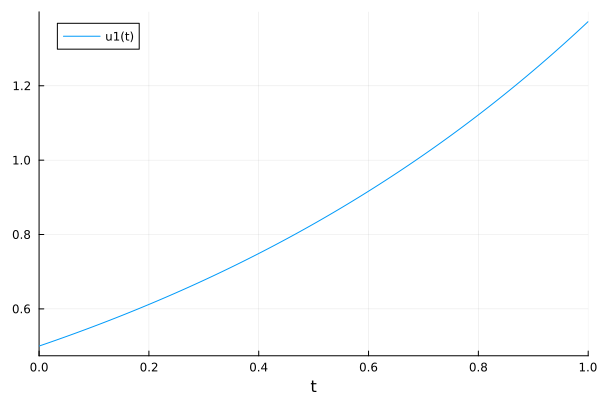

In [94]:
plot(sol)

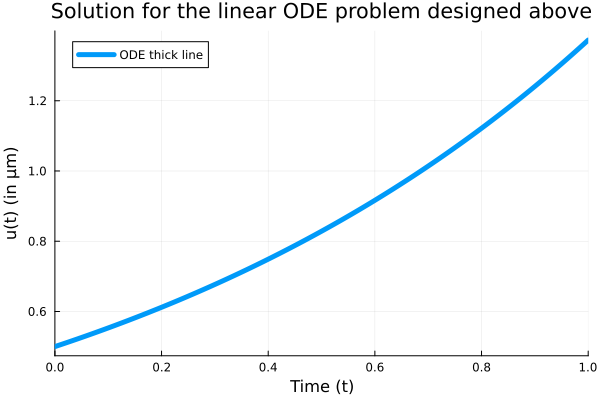

In [95]:
plot(sol, linewidth=5, title="Solution for the linear ODE problem designed above",
xaxis="Time (t)", yaxis="u(t) (in μm)", label="ODE thick line")

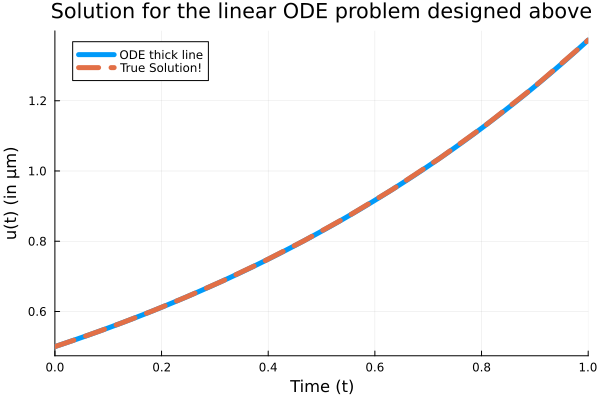

In [96]:
plot!(sol.t, t->0.5*exp(1.01t), lw=5, ls=:dash, label="True Solution!")

<br>

### **Example 2: Solving Systems of Equations**

In this example we will solve Lorenz equations:

$\frac{dx}{dt} = \sigma (y - x) $

$\frac{dy}{dt} = x (\rho - z) - y$

$\frac{dz}{dt} = xy - \beta z $

**Defining the ODE function to be in-place updating can have performance benefits.**

This means that, instead of writing a function which outputs its solution, you write a function which updates a vector that is designated to hold the solution.

For example, writing the Lorenz eaquation would result in the following function:

In [97]:
function lorenz!(du, u, p, t)
    du[1] = 10.0 * (u[2] - u[1])
    du[2] = u[1] * (28.0 - u[3]) - u[2]
    du[3] = u[1] * u[2] - (8/3) * u[3]
end

lorenz! (generic function with 1 method)

And then we can make use of this function in a problem:

In [98]:
u0 = [1.0; 0.0; 0.0]
tspan = (0.0, 100.0)
prob = ODEProblem(lorenz!, u0, tspan)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 3-element Vector{Float64}:
 1.0
 0.0
 0.0

In [99]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1263-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624077544510573
   0.009058075635317072
   0.01695646895607931
   0.02768995855685593
   0.04185635042021763
   0.06024041165841079
   0.08368541255159562
   0.11336499649094857
   0.1486218182609657
   0.18703978481550704
   ⋮
  99.05535949898116
  99.14118781914485
  99.22588252940076
  99.30760258626904
  99.39665422328268
  99.49536147459878
  99.58822928767293
  99.68983993598462
  99.77864535713971
  99.85744078539504
  99.93773320913628
 100.0
u: 1263-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799208e-8]
 [0.9961045497425811, 0.010965399721242457, 2.146955365838907e-6]
 [0.9693591634199452, 0.08977060667778931, 0.0001438018342266937]
 [0.9242043615038835, 0.24228912482984957, 0.001046162

#### **Plotting**

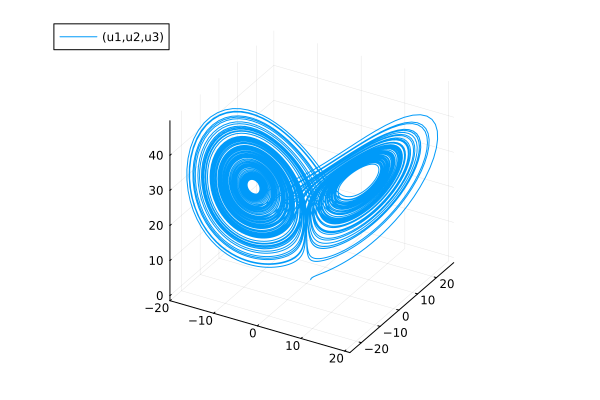

In [100]:
# plotting for multiple time series
plot(sol, idxs=(1, 2, 3))

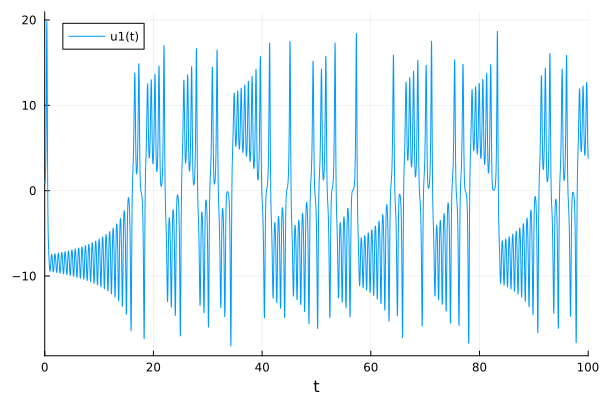

In [101]:
# Plotting just for u[1]
plot(sol, idxs=(0, 1))

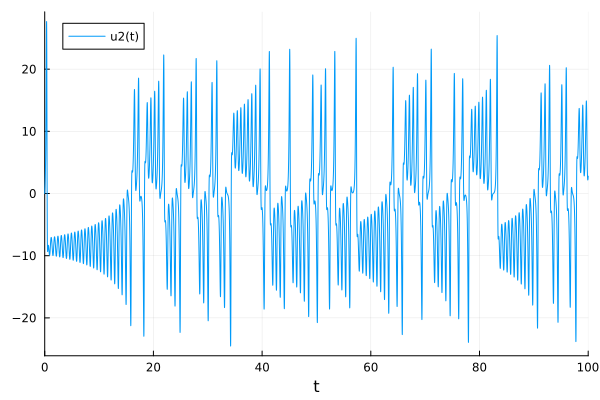

In [102]:
# Plotting just for u[2]
plot(sol, idxs=(0, 2))

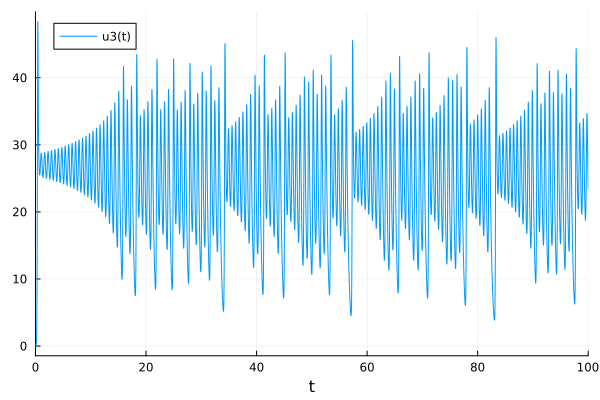

In [103]:
# Plotting just for u[3]
plot(sol, idxs=(0, 3))

## **Defining Parametrized Functions**

Explicitly defining parameters associatecd with differential equations. Using `p` values via syntax:

$\frac{dx}{dt} = \sigma (y - x) $

$\frac{dy}{dt} = x (\rho - z) - y$

$\frac{dz}{dt} = xy - \beta z $

In [104]:
function parameterized_lorenz!(du, u, p, t)#
    du[1] = p[1] * (u[2] - u[1])
    du[2] = u[1] * (p[2] - u[3]) - u[2]
    du[3] = u[1] * u[2] - p[3] * u[3]
end

parameterized_lorenz! (generic function with 1 method)

In [105]:
# Adding parameters for the ODEProblem
u0 = [1.0, 0.0, 0.0]
tspan = (0.0, 1.0)
p = [10.0, 28.0, 8/3]

prob = ODEProblem(parameterized_lorenz!, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 1.0)
u0: 3-element Vector{Float64}:
 1.0
 0.0
 0.0

<br>

### **An alternative way to make our functions looking nicer is:**

In [106]:
function parameterized_lorenz!(du, u, p, t)
    x, y, z = u
    σ, ρ, β = p
    du[1] = dx = σ * (y - x)
    du[2] = dy = x * (ρ - z) - y
    du[3] = dz = x * y - β * z
end

parameterized_lorenz! (generic function with 1 method)

In [107]:
# Adding parameters for the ODEProblem
u0 = [1.0, 0.0, 0.0]
tspan = (0.0, 50.0)
p = (10.0, 28.0, 8/3)

prob = ODEProblem(parameterized_lorenz!, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 50.0)
u0: 3-element Vector{Float64}:
 1.0
 0.0
 0.0

In [108]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 619-element Vector{Float64}:
  0.0
  3.5678604836301404e-5
  0.0003924646531993154
  0.0032624077544510573
  0.009058075635317072
  0.01695646895607931
  0.02768995855685593
  0.04185635042021763
  0.06024041165841079
  0.08368541255159562
  0.11336499649094857
  0.1486218182609657
  0.18703978481550704
  ⋮
 49.26387158527551
 49.34111300531171
 49.41814996139995
 49.48027960186086
 49.54563159926367
 49.612680266267624
 49.6832638710836
 49.74562642942327
 49.804257220313666
 49.87167773186368
 49.94409774874728
 50.0
u: 619-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799208e-8]
 [0.9961045497425811, 0.010965399721242457, 2.146955365838907e-6]
 [0.9693591634199452, 0.08977060667778931, 0.0001438018342266937]
 [0.9242043615038835, 0.24228912482984957, 0.0010461623302512404]
 [0.88004558689

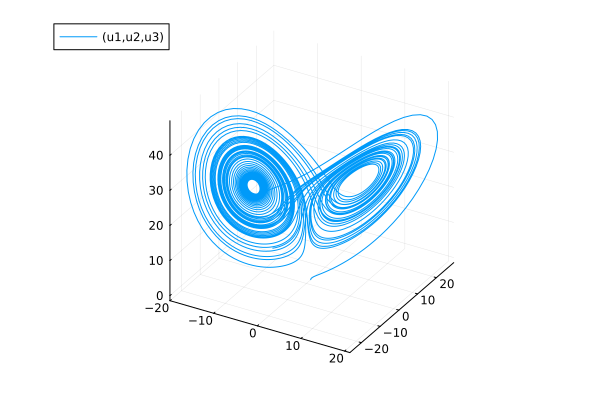

In [109]:
plot(sol, idxs=(1, 2, 3))

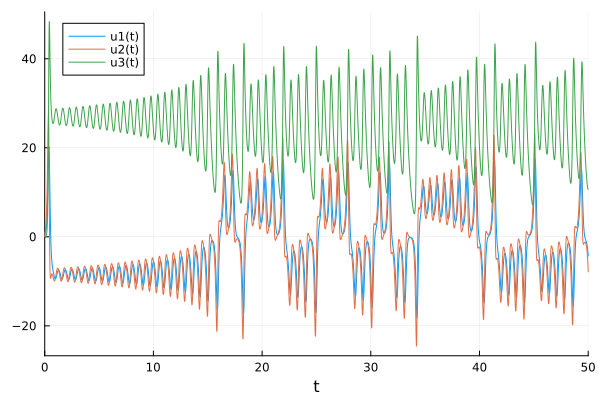

In [110]:
plot(sol)

<br>

<br>

## **Extra Example: Domain Specific Language for Parametrized Functions**

In many cases we may want to define a lot of functions with parameters. We can use the `@ode_def` mmacro for helping with this common problem.

Let's define the Lotka-Volterra equation:

$$\frac{dx}{dt} = ax - bxy $$

$$\frac{dy}{dt} = cy + dxy $$

In [111]:
function lotka_volterra!(du, u, p, t)
    du[1] = p[1]*u[1] - p[2]*u[1]*u[2]
    du[2] = -p[3]*u[2] + p[4]*u[1]*u[2]
end

lotka_volterra! (generic function with 1 method)

However, we could get lost as there is a lpot of "programming" on the way. Instead, we can use `@ode_def` macro:

In [112]:
#Pkg.add("ParameterizedFunctions")
using ParameterizedFunctions

In [113]:
lv! = @ode_def LotkaVolterra! begin
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
end a b c d

(::LotkaVolterra!{var"###ParameterizedDiffEqFunction#356", var"###ParameterizedTGradFunction#357", var"###ParameterizedJacobianFunction#358", Nothing, Nothing, ODESystem}) (generic function with 1 method)

Now we will solve the `lv!` function:

In [114]:
u0 = [1.0, 1.0]
p = (1.5, 1.0, 3.0, 1.0)
tspan = (0.0, 10.0)

prob = ODEProblem(lv!, u0, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 34-element Vector{Float64}:
  0.0
  0.0776084743154256
  0.23264513699277584
  0.4291185174543143
  0.6790821987497083
  0.9444046158046306
  1.2674601546021105
  1.6192913303893046
  1.9869754428624007
  2.2640902393538296
  2.5125484290863063
  2.7468280298123062
  3.0380065851974147
  ⋮
  6.455762090996754
  6.780496138817711
  7.171040059920871
  7.584863345264154
  7.978068981329682
  8.48316543760351
  8.719248247740158
  8.949206788834692
  9.200185054623292
  9.438029017301554
  9.711808134779586
 10.0
u: 34-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [1.0454942346944578, 0.8576684823217127]
 [1.1758715885138267, 0.639459570317544]
 [1.4196809607170826, 0.4569962601282084]
 [1.876719395008001, 0.32473342927911314]
 [2.5882500645533466, 0.26336255535952163]
 [3.8607089092207665, 0.2794458098285253]
 [5.750812667710396, 0.5220072537934558]
 [

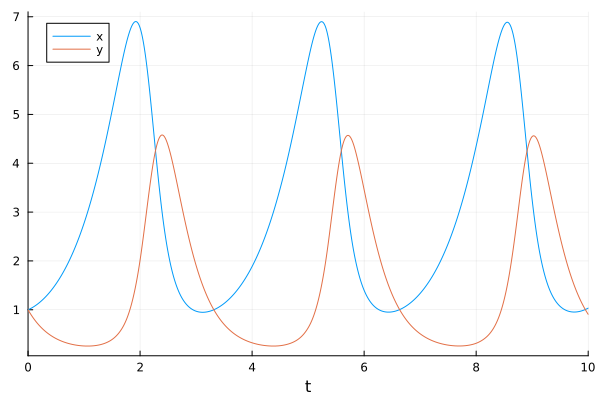

In [115]:
plot(sol)

<br>

<br>

### Example 3: Solving Nonhomogeneous Equations using Parameterized Functions

Parameterized functions can also be used for building nonhomogeneous ordinary differential equations (these are also referred to as ODEs with nonzero right-hand sides). They are frequently used as models for dynamical systems with external (in general time-varying) inputs. As an example, consider a model of a pendulum consisting of a slender rod of length l and mass m:

$$\frac{d\theta (t)}{dt} = \omega (t)$$

$$\frac{d\omega (t)}{dt} = -\frac{3}{2} \frac{g}{l} sin\theta (t) + \frac{3}{ml^2} M(t)'$$

where θ and ω are the angular deviation of the pendulum from the vertical (hanging) orientation and the angular rate, respectively, M is an external torque (developed, say, by a wind or a motor), and finally, g stands for gravitational acceleration.

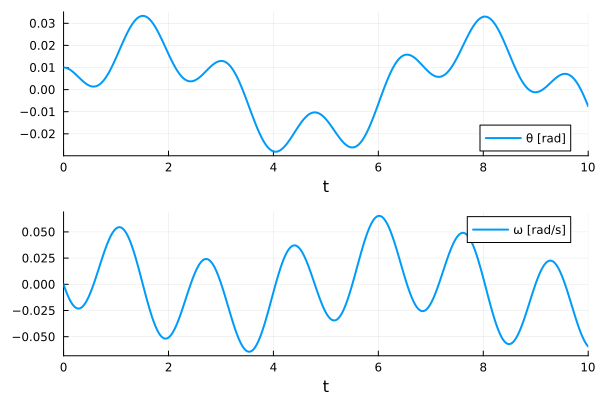

In [123]:
l = 1.0                             # length [m]
m = 1.0                             # mass [kg]
g = 9.81                            # gravitational acceleration [m/s²]

function pendulum!(du,u,p,t)
    du[1] = u[2]                    # θ'(t) = ω(t)
    du[2] = -3g/(2l)*sin(u[1]) + 3/(m*l^2)*p(t) # ω'(t) = -3g/(2l) sin θ(t) + 3/(ml^2)M(t)
end

θ₀ = 0.01                           # initial angular deflection [rad]
ω₀ = 0.0                            # initial angular velocity [rad/s]
u₀ = [θ₀, ω₀]                       # initial state vector
tspan = (0.0,10.0)                  # time interval

M = t->0.1sin(t)                    # external torque [Nm]

prob = ODEProblem(pendulum!,u₀,tspan,M)
sol = solve(prob)

plot(sol,linewidth=2,xaxis="t",label=["θ [rad]" "ω [rad/s]"],layout=(2,1))

Note how the external time-varying torque M is introduced as a parameter in the pendulum! function. Indeed, as a general principle the parameters can be any type; here we specify M as time-varying by representing it by a function, which is expressed by appending the dependence on time (t) to the name of the parameter.

Note also that, in contrast with the time-varying parameter, the (vector of) state variables u, which is generally also time-varying, is always used without the explicit dependence on time (t).